In [54]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt


c:\Users\NG\OneDrive\Desktop\Donation\python_ml\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [59]:
df = pd.read_csv("./donations_data.csv")

In [60]:
df.head()

,Members Name,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11
0,Noor Fatima Sadaqat,0,500,600,0,0.00,0,0,300,1350.0,1000,1390
1,Zunaira Shafiq,2000,500,750,800,0.00,0,0,0,5680.0,8755,9465
2,Muneeb Salman,6946,0,2000,13610,15750.00,22200,29791,88200,71418.0,49454,71311
3,Mubasal Malik,32082,50395,11040,62750,6483.00,0,200,0,3200.0,0,4000
4,Nasir Mukhtar,0,6750,5000,6000,27153.27,20700,35356,16000,18850.0,14000,11200


In [61]:
# Setting index for time series analysis
df.set_index('Members Name', inplace=True)

In [62]:
# Transpose the DataFrame to have months as rows and members as columns
df = df.transpose()

In [63]:
# Preprocessing: Replace NaN, 'R', and 'O' with 0
df.replace(to_replace=[np.nan, 'R', 'O'], value=0, inplace=True)

C:\Users\NG\AppData\Local\Temp\ipykernel_17032\1344077013.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(to_replace=[np.nan, 'R', 'O'], value=0, inplace=True)


In [64]:
# Convert all values to numeric, coercing errors and dropping non-numeric columns
df = df.apply(pd.to_numeric, errors='coerce')

# Fill missing values with 0 or use another strategy if preferred
df.fillna(0, inplace=True)

In [65]:
df.head()

Members Name,Noor Fatima Sadaqat,Zunaira Shafiq,Muneeb Salman,Mubasal Malik,Nasir Mukhtar,Fatima Noor,Tahir Mehmood,Mubarra Sajjid,Muhammad Ali,Hamza Naveed,...,Ali Raza,Umar javed,Maryam Nawaz,Mahnoor Jahangir,Zargham Ahmad Ch,Badar Butt,Hassan Riaz,Khawaja Abdul wahab,Areeba Hashmi,Neha Hashmi
2024-01,0.0,2000.0,6946.0,32082.0,0.00,0.0,51562.0,4000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-02,500.0,500.0,0.0,50395.0,6750.00,0.0,10830.0,100.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-03,600.0,750.0,2000.0,11040.0,5000.00,0.0,8137.0,100.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-04,0.0,800.0,13610.0,62750.0,6000.00,0.0,11600.0,13660.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-05,0.0,0.0,15750.0,6483.0,27153.27,10810.0,0.0,0.0,18250.0,8920.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,650.0


In [66]:
# Check for NaN values
nan_check = df.isna().sum()
print(nan_check)

Members Name
Noor Fatima Sadaqat    0
Zunaira Shafiq         0
Muneeb Salman          0
Mubasal Malik          0
Nasir Mukhtar          0
                      ..
Badar Butt             0
Hassan Riaz            0
Khawaja Abdul wahab    0
Areeba Hashmi          0
Neha Hashmi            0
Length: 637, dtype: int64


In [67]:
import pandas as pd
# Check for non-numeric values
non_numeric_check = df.apply(lambda col: pd.to_numeric(col, errors='coerce').isna().sum())
print(non_numeric_check)

Members Name
Noor Fatima Sadaqat    0
Zunaira Shafiq         0
Muneeb Salman          0
Mubasal Malik          0
Nasir Mukhtar          0
                      ..
Badar Butt             0
Hassan Riaz            0
Khawaja Abdul wahab    0
Areeba Hashmi          0
Neha Hashmi            0
Length: 637, dtype: int64


In [74]:
# Set frequency for time series data (monthly)
df.index = pd.date_range(start='2024-01-01', periods=len(df), freq='M')

C:\Users\NG\AppData\Local\Temp\ipykernel_17032\798326635.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.index = pd.date_range(start='2024-01-01', periods=len(df), freq='M')


In [75]:
# Function to calculate Simple Moving Average and forecast next month's value for each member
def forecast_next_month(member_data, window=3):
    # Calculate the moving average
    moving_avg = member_data.rolling(window=window).mean()
    
    # Forecast next month as the last moving average value
    return moving_avg.iloc[-1]

# Dictionary to store predictions for each member
predictions = {}

In [76]:
# Loop through each member and forecast their next month's donation using SMA
for member in df.columns:
    predictions[member] = forecast_next_month(df[member])

# Convert predictions to DataFrame for better visualization
predictions_df = pd.DataFrame(predictions.items(), columns=['Members Name', 'Predicted Donation for Next Month'])

# Display predictions
print(predictions_df)

            Members Name Predicted Donation for Next Month
0    Noor Fatima Sadaqat                       1246.666667
1         Zunaira Shafiq                       7966.666667
2          Muneeb Salman                           64061.0
3          Mubasal Malik                            2400.0
4          Nasir Mukhtar                      14683.333333
..                   ...                               ...
618           Badar Butt                               0.0
619          Hassan Riaz                               0.0
620  Khawaja Abdul wahab                            5300.0
621       Areeba Hashmi                             4200.0
622          Neha Hashmi                       3660.666667

[623 rows x 2 columns]


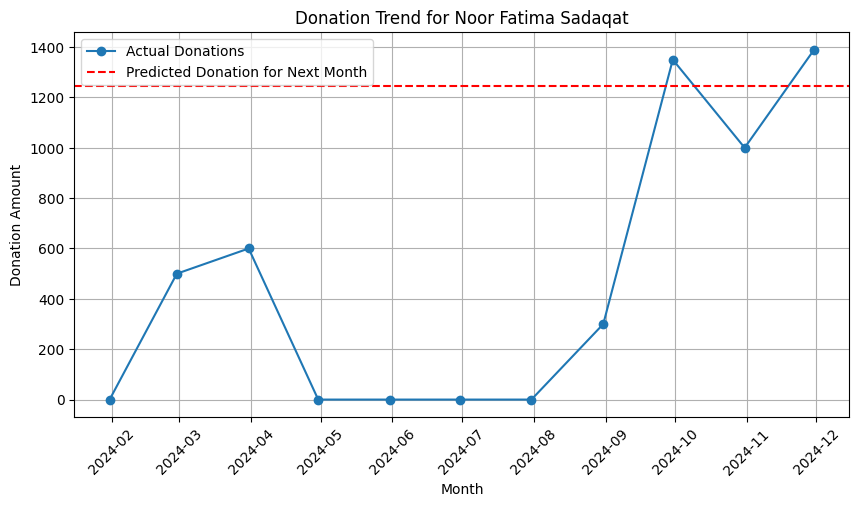

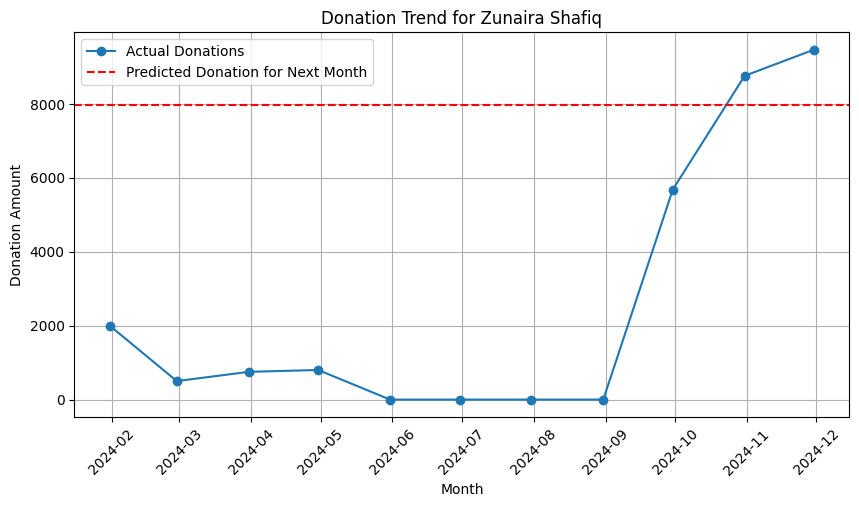

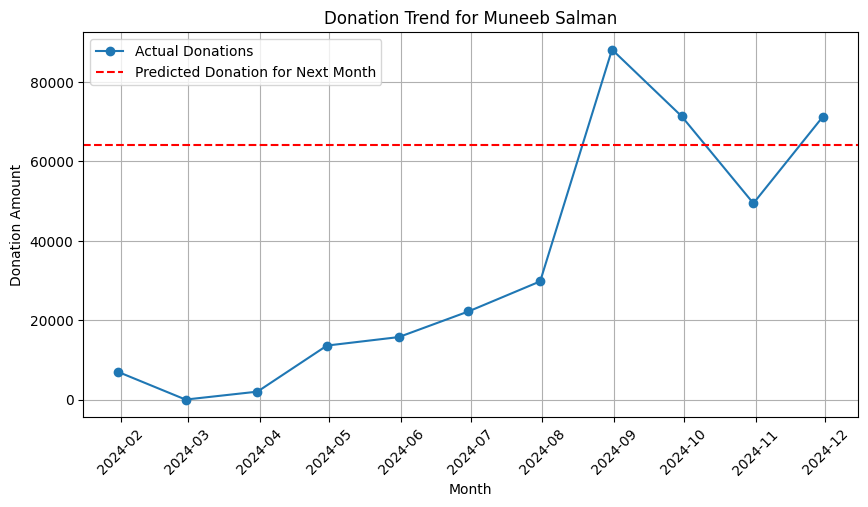

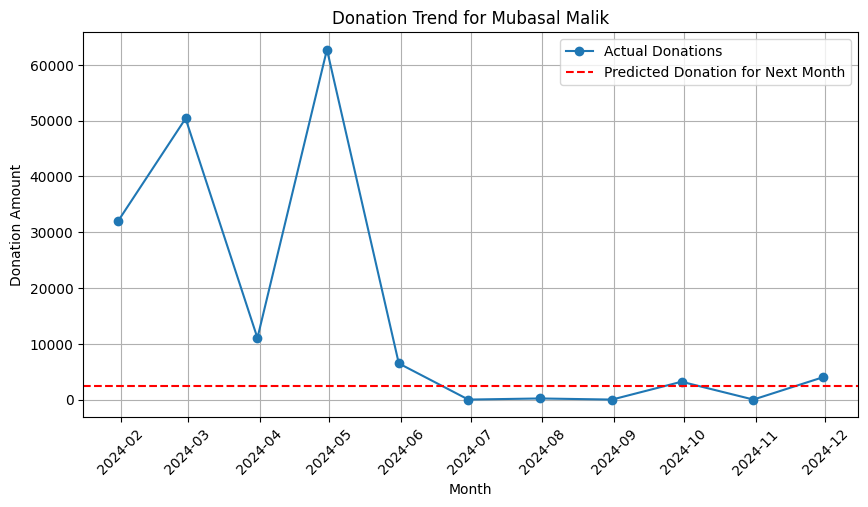

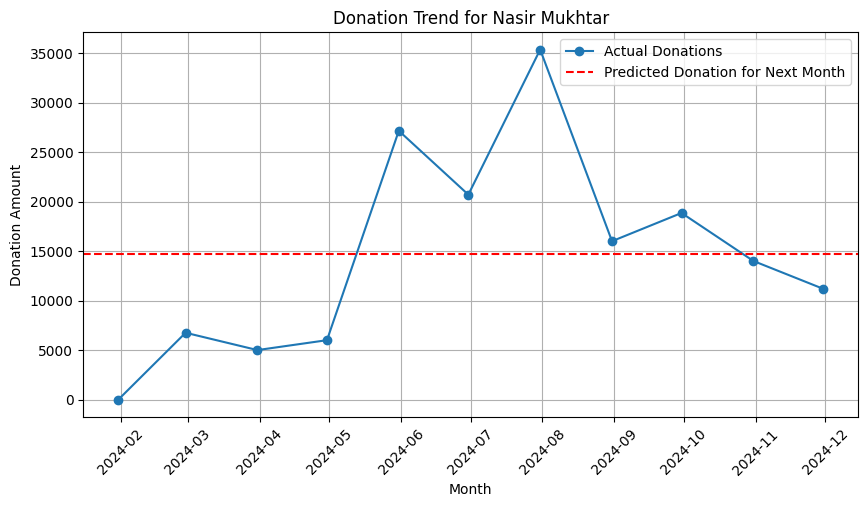

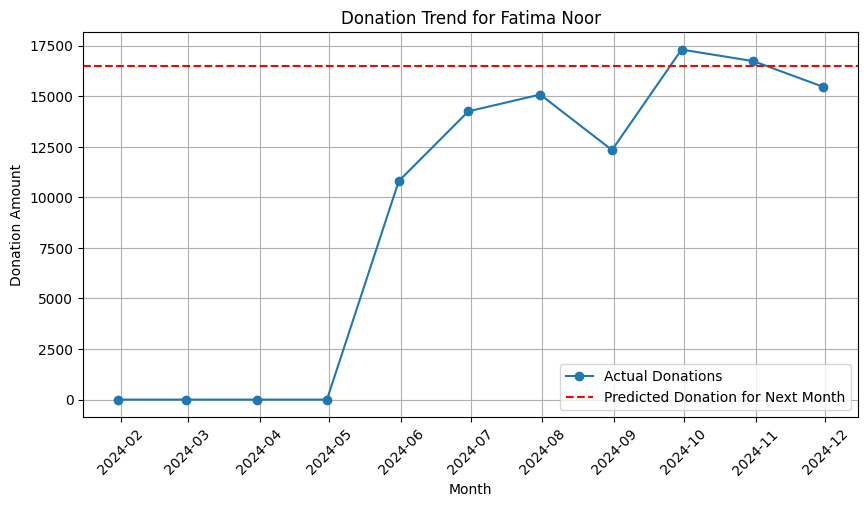

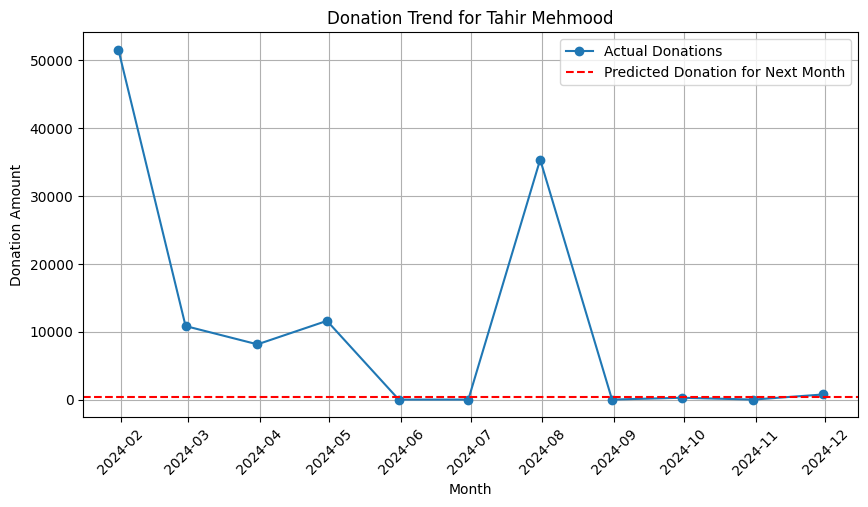

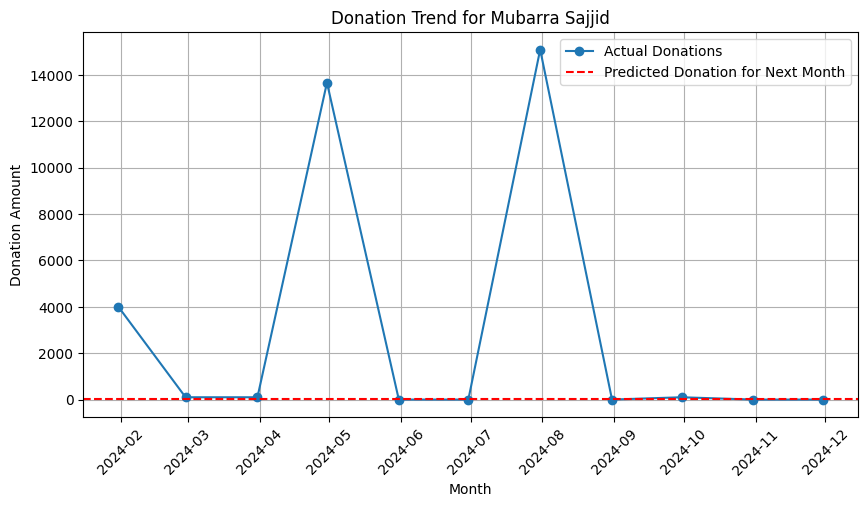

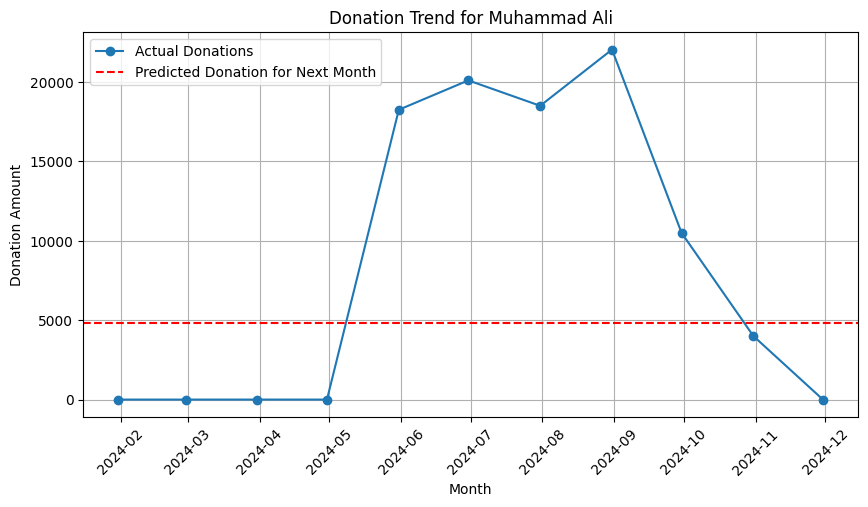

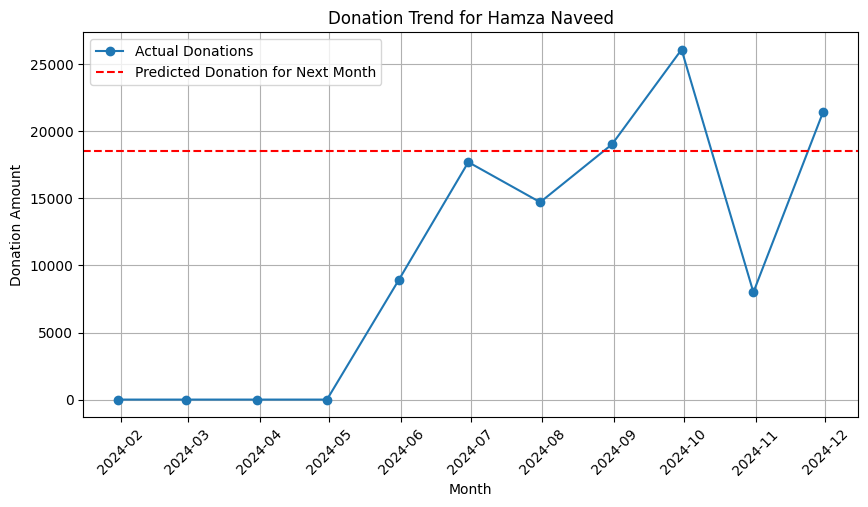

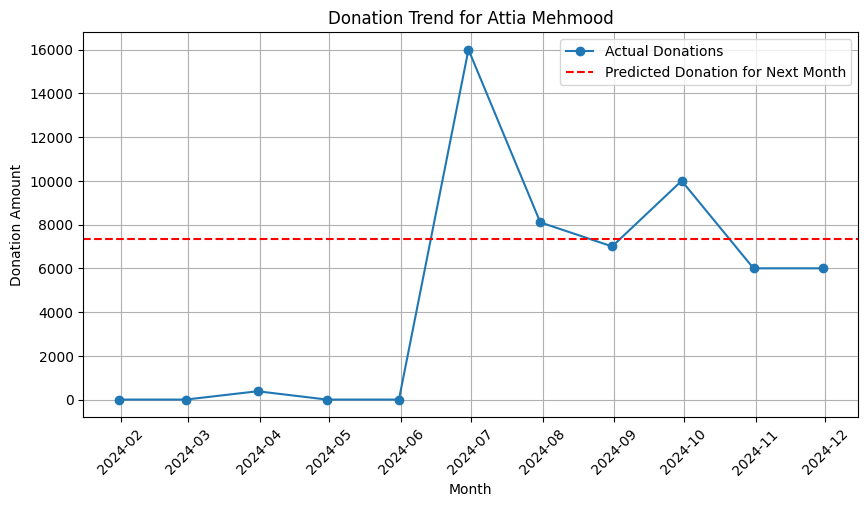

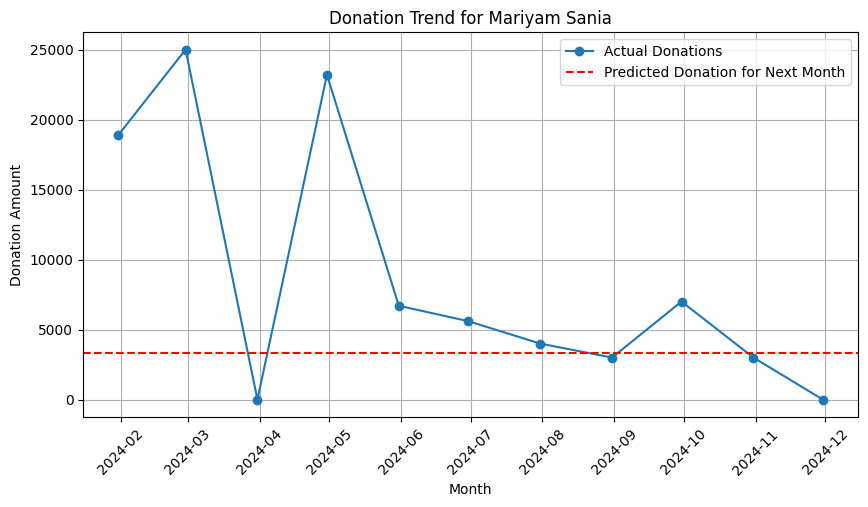

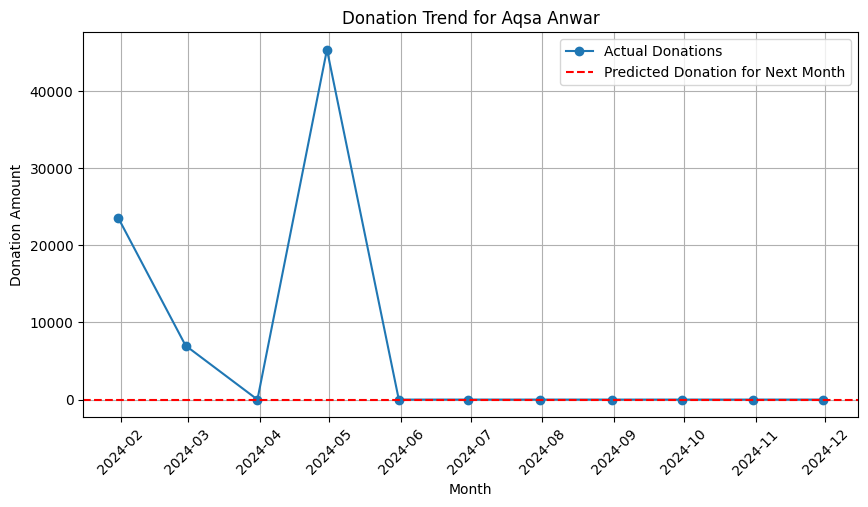

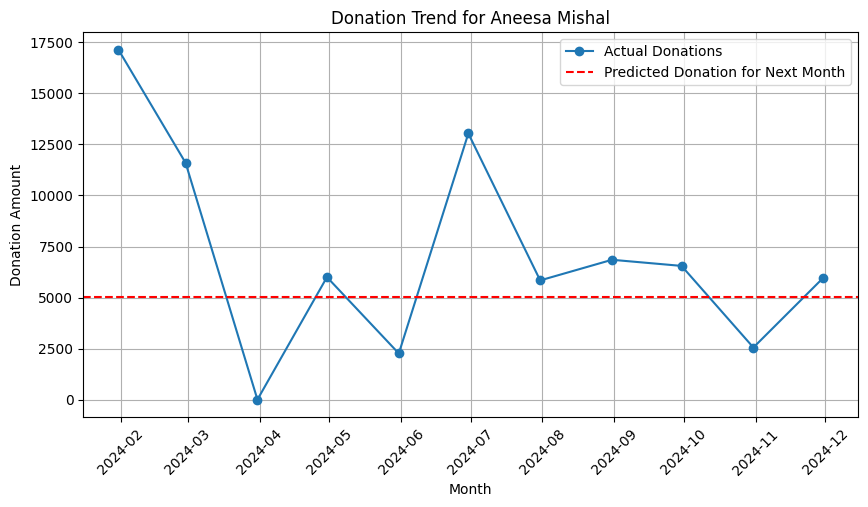

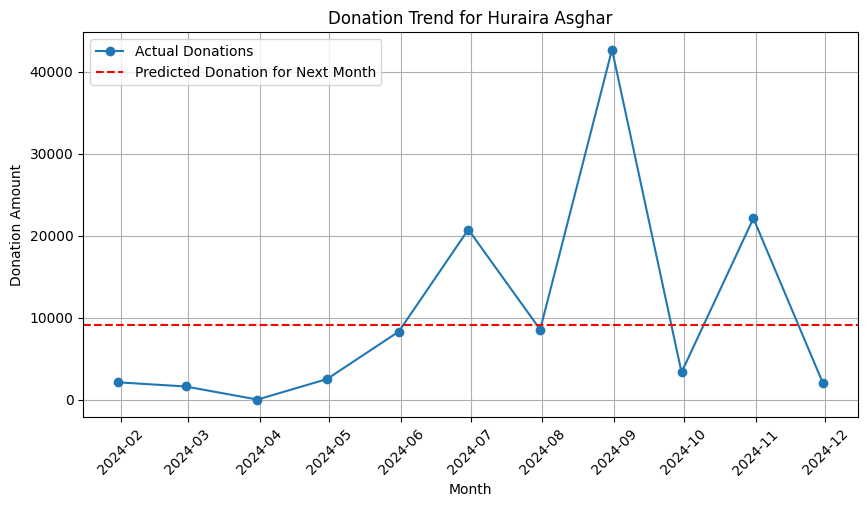

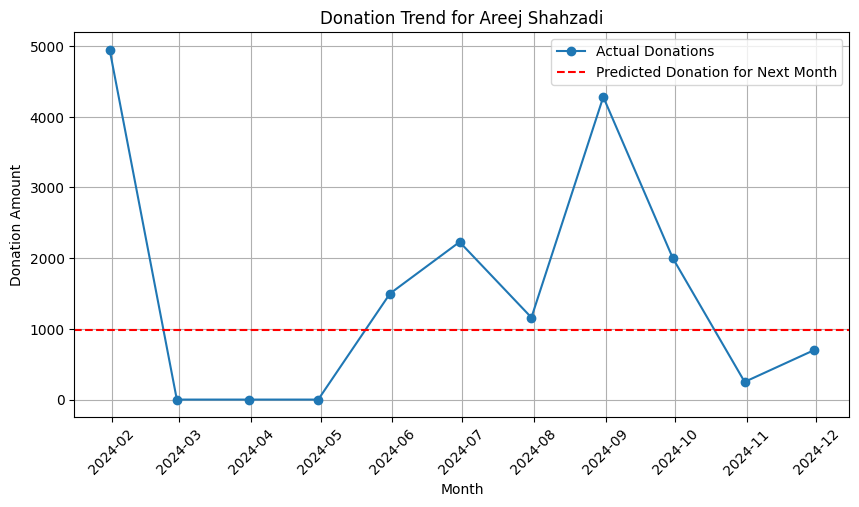

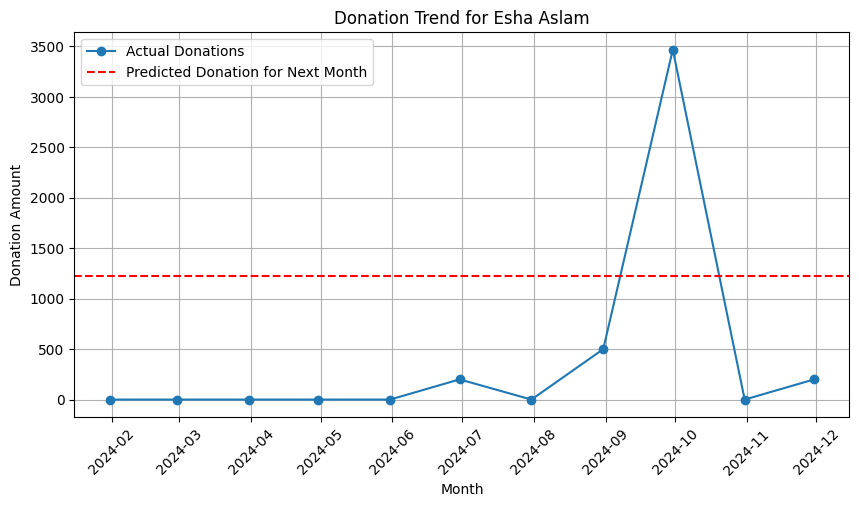

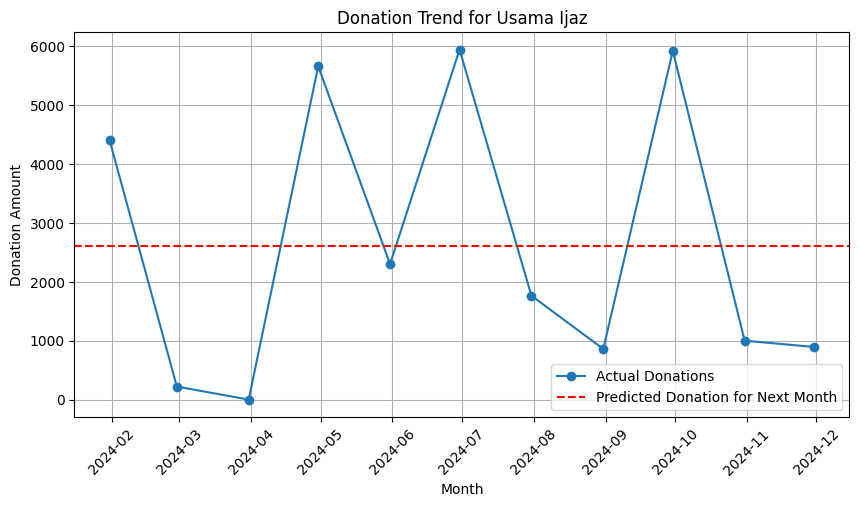

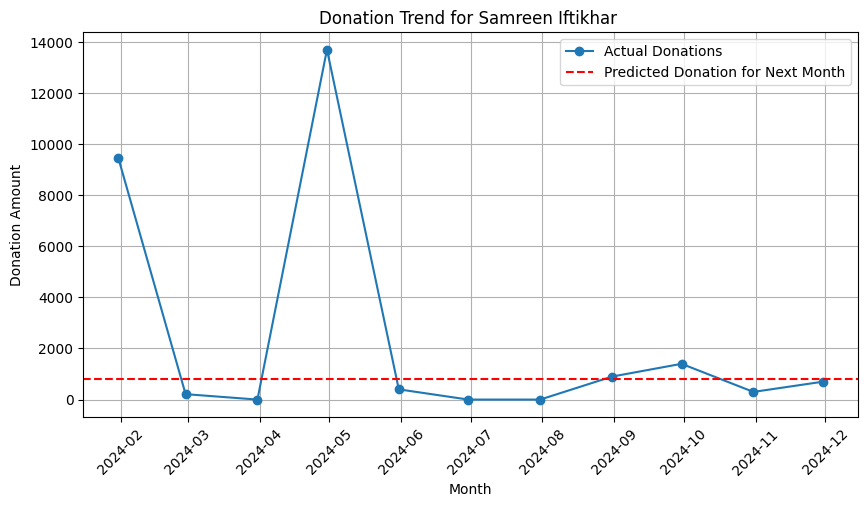

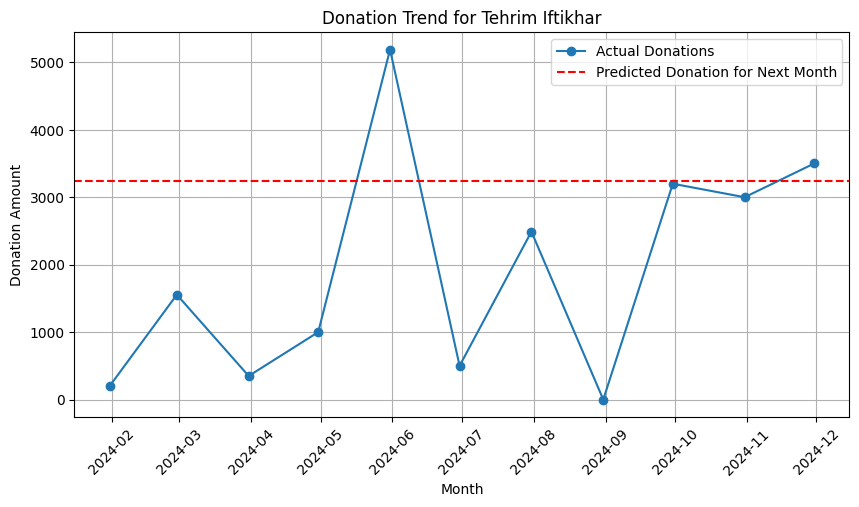

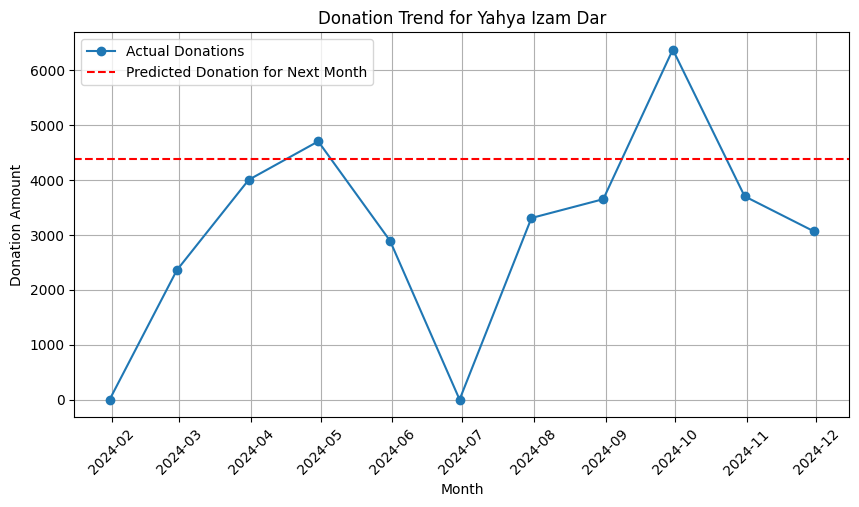

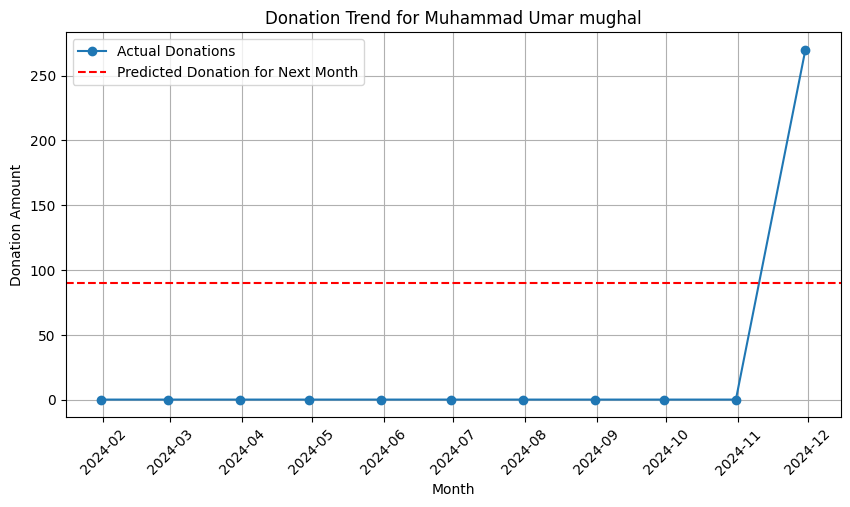

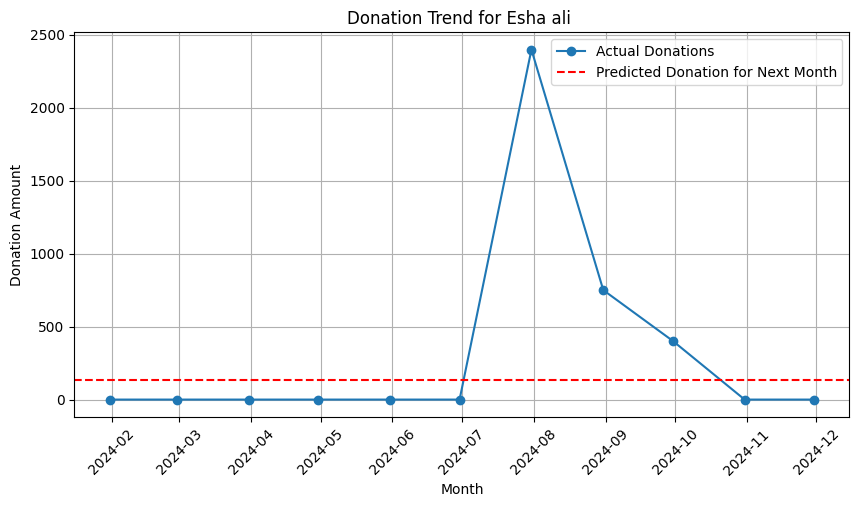

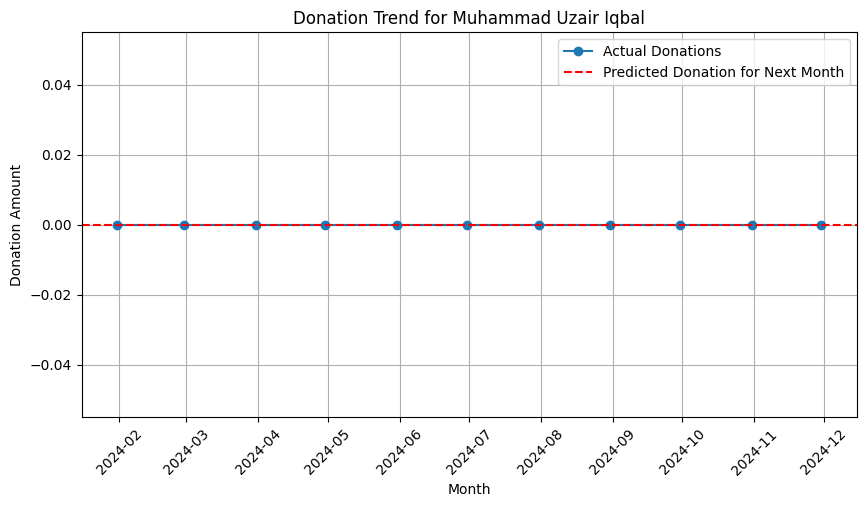

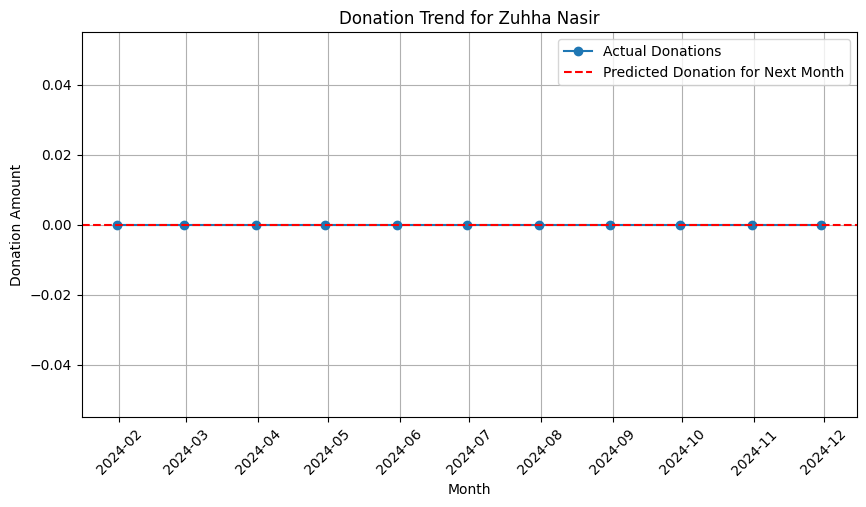

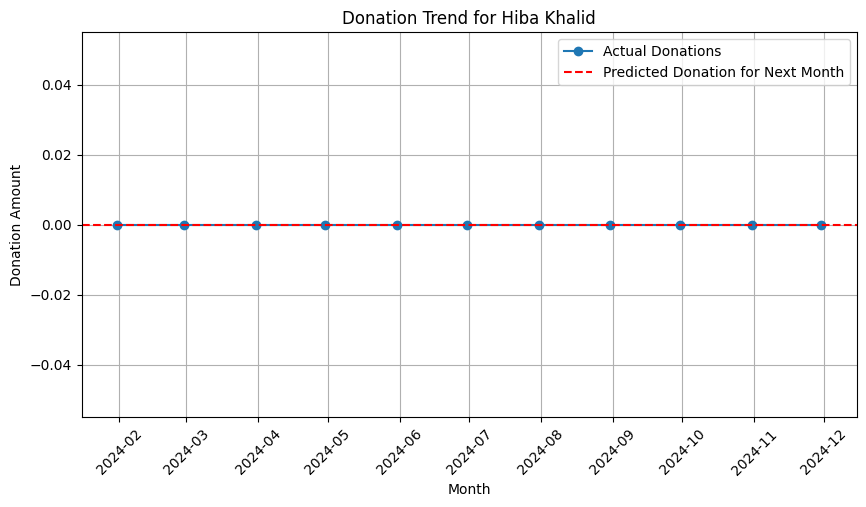

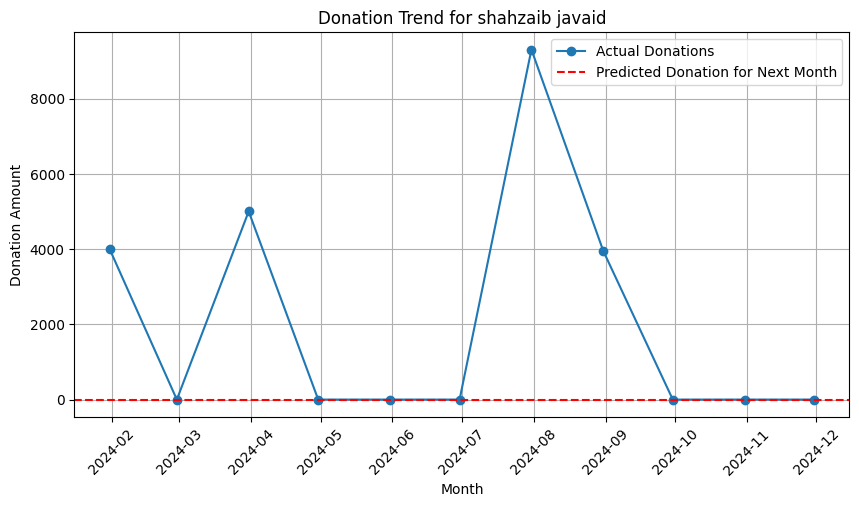

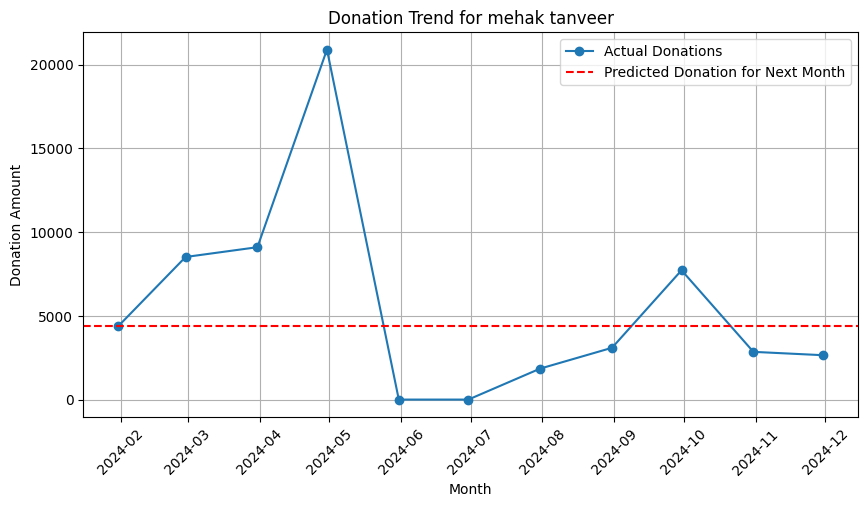

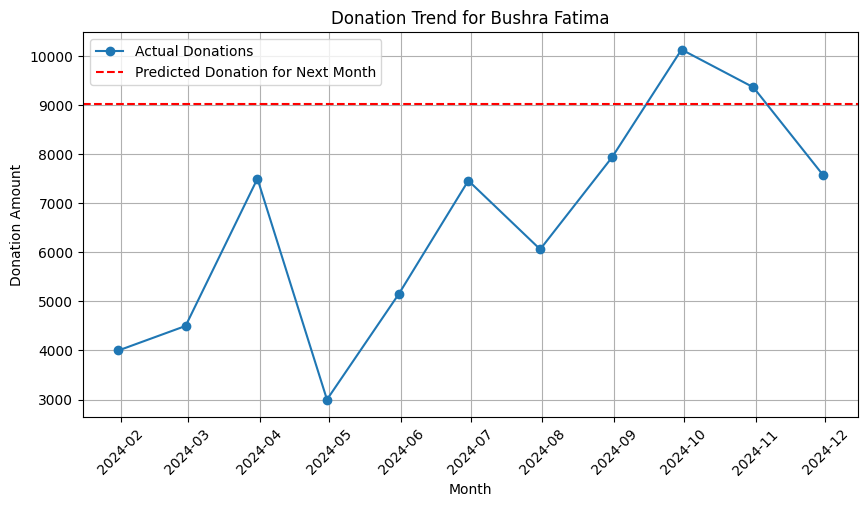

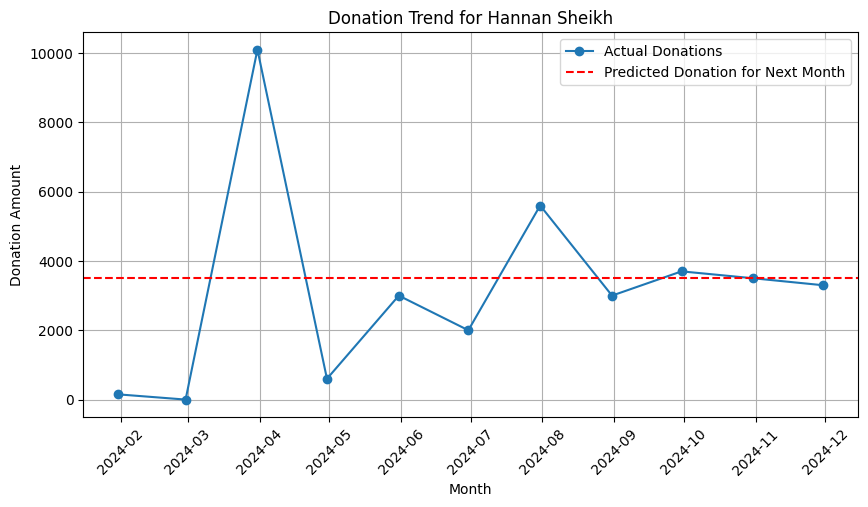

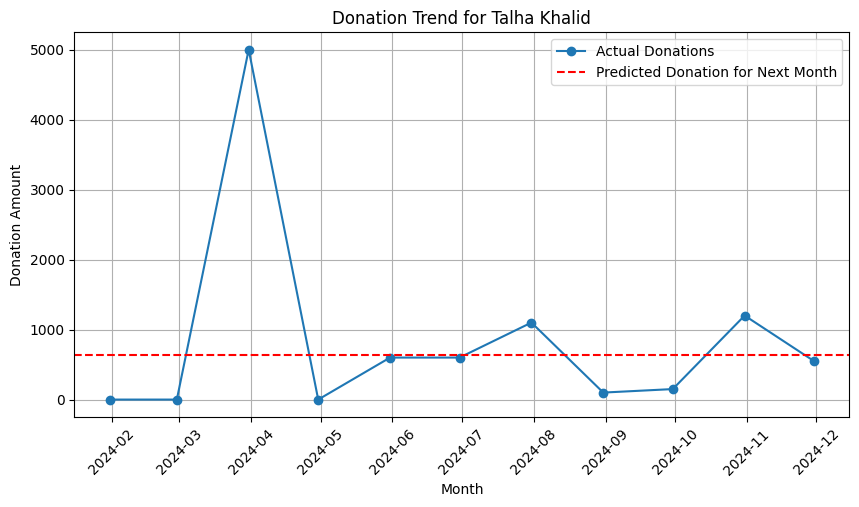

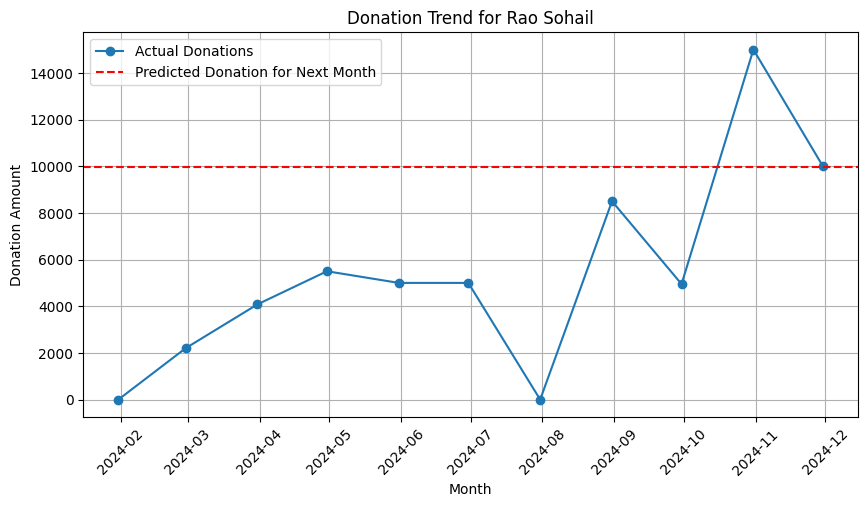

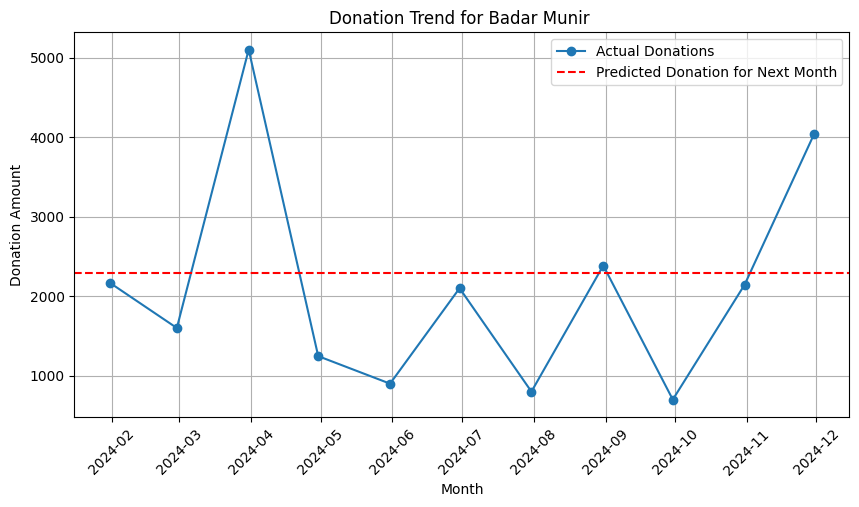

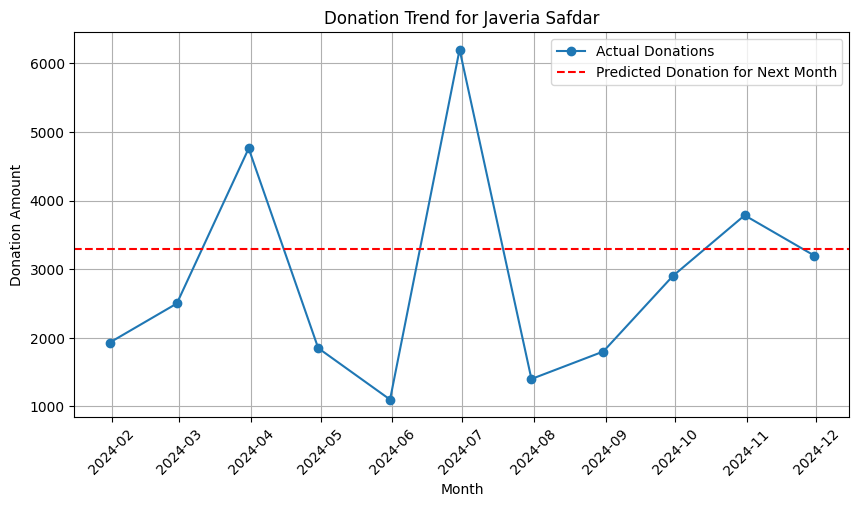

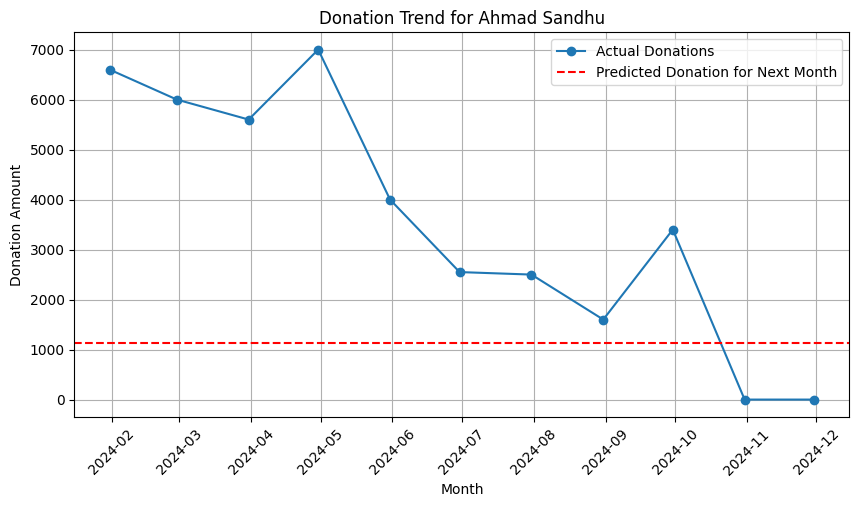

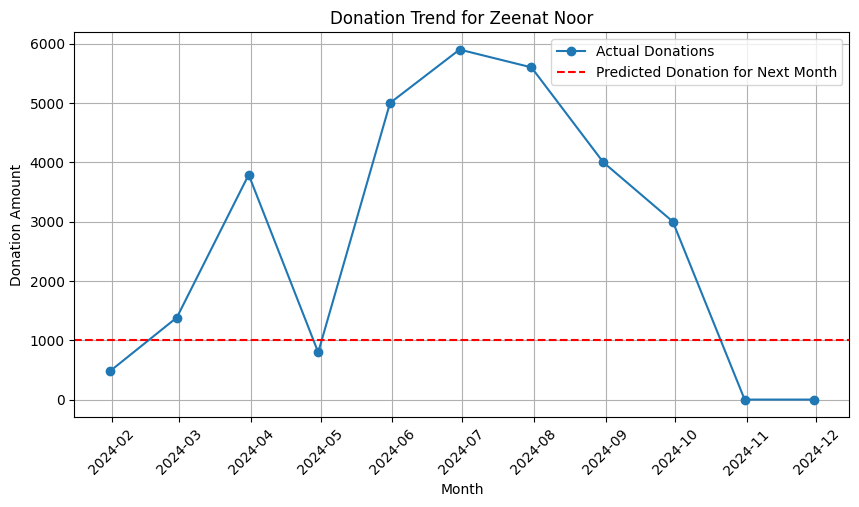

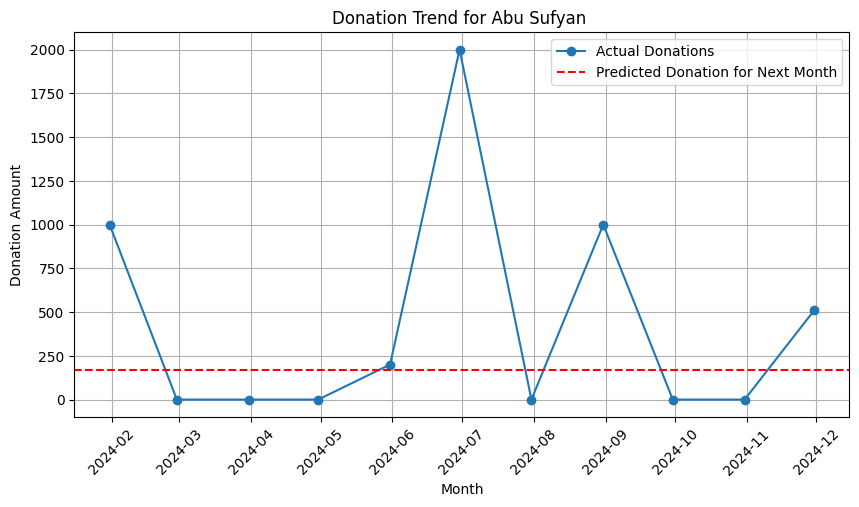

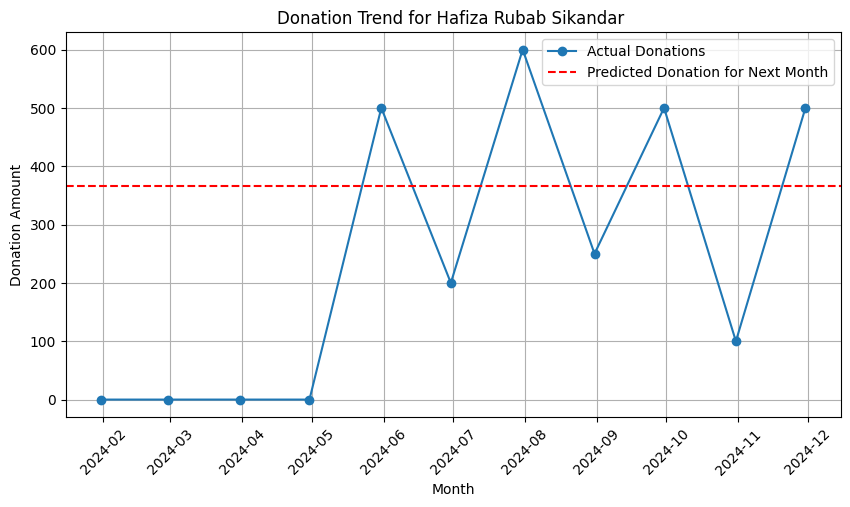

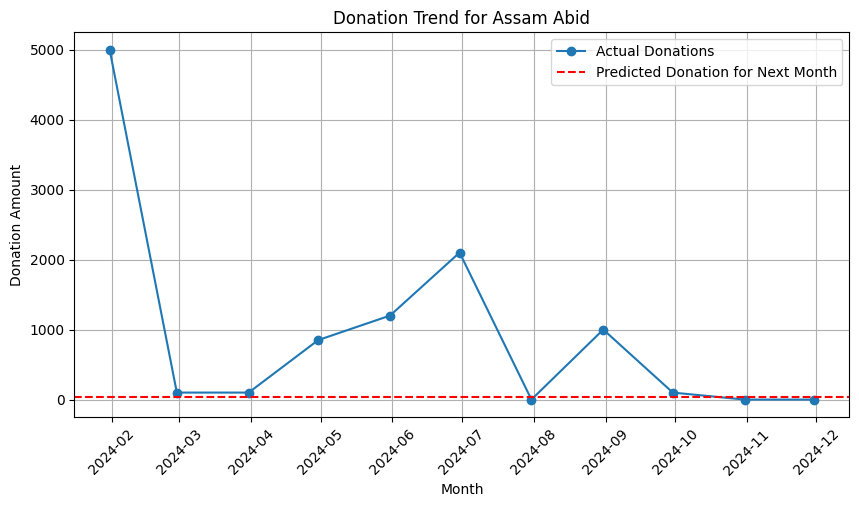

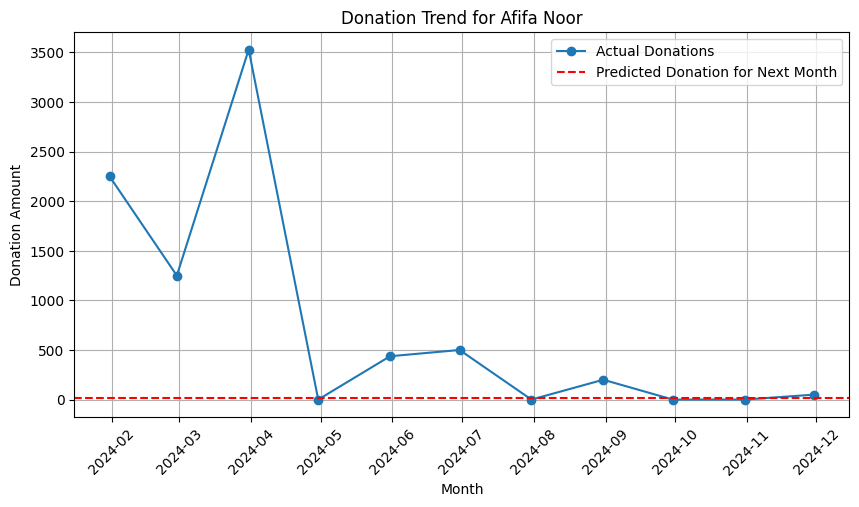

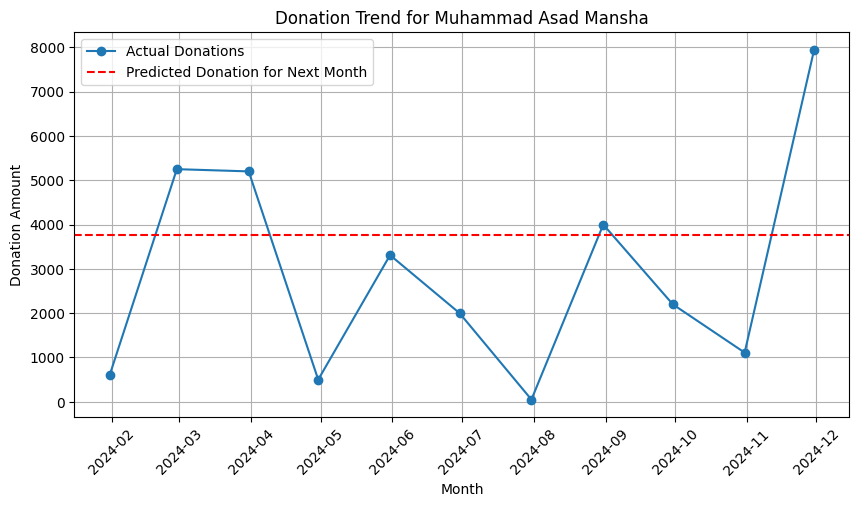

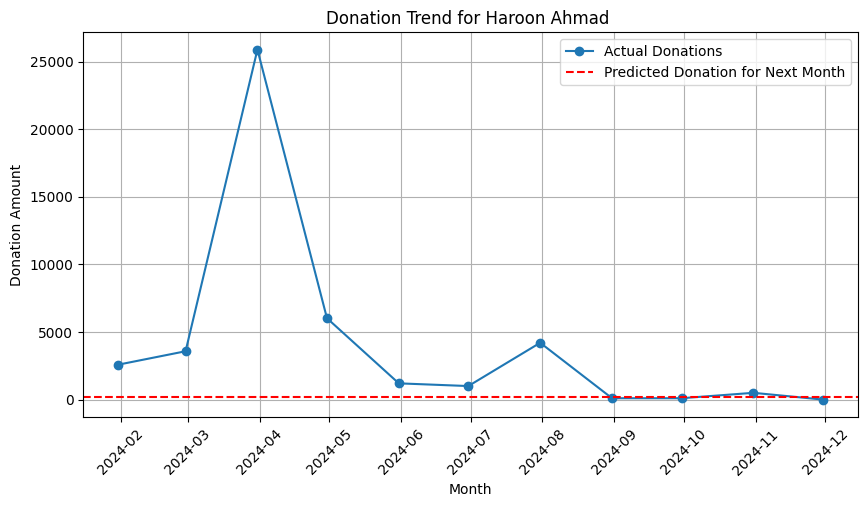

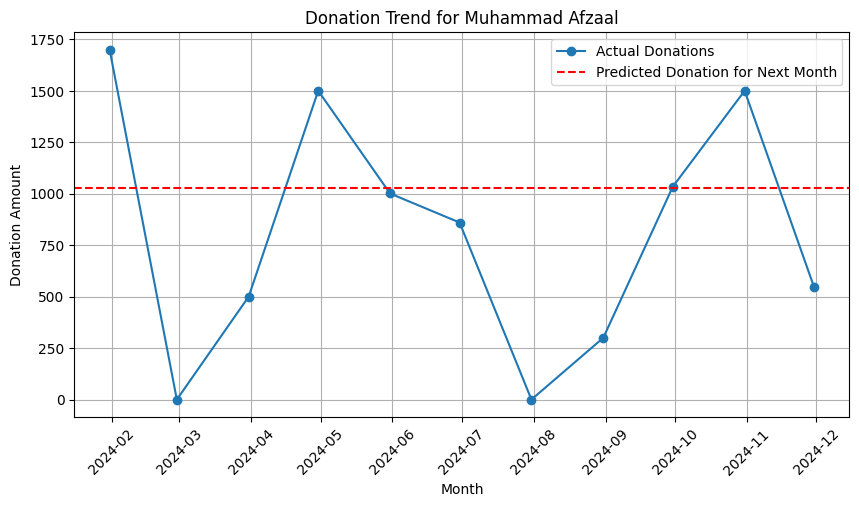

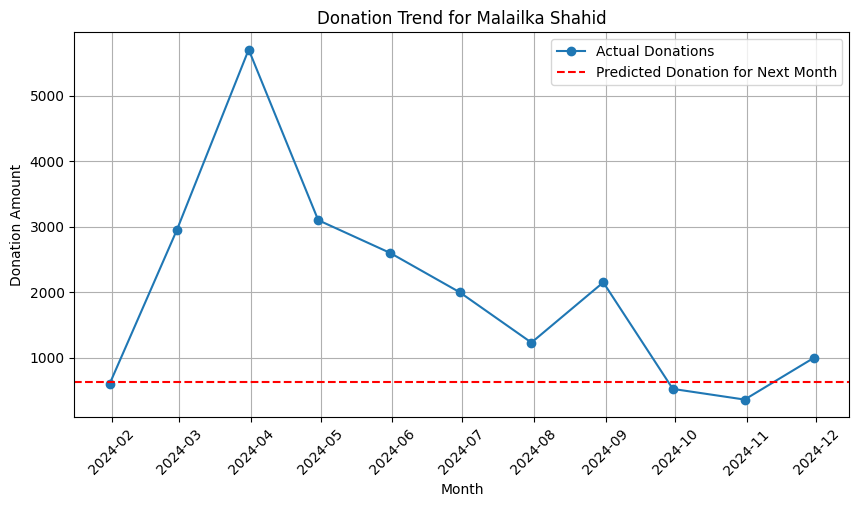

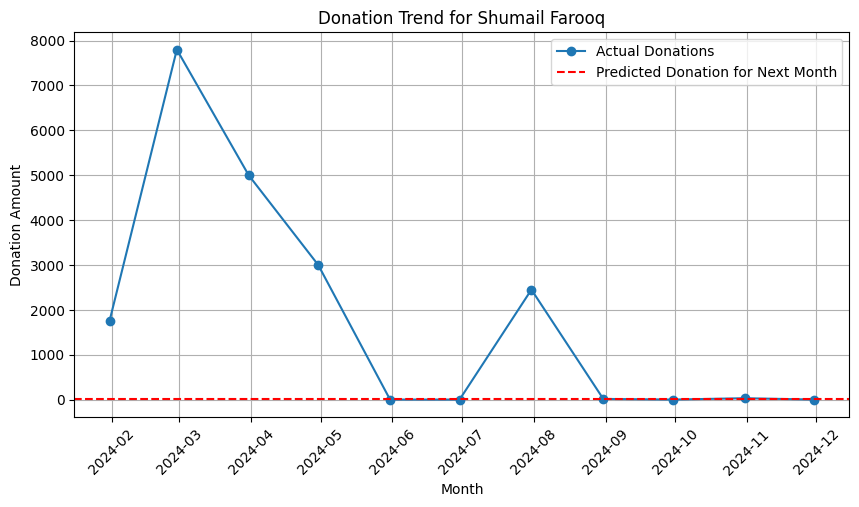

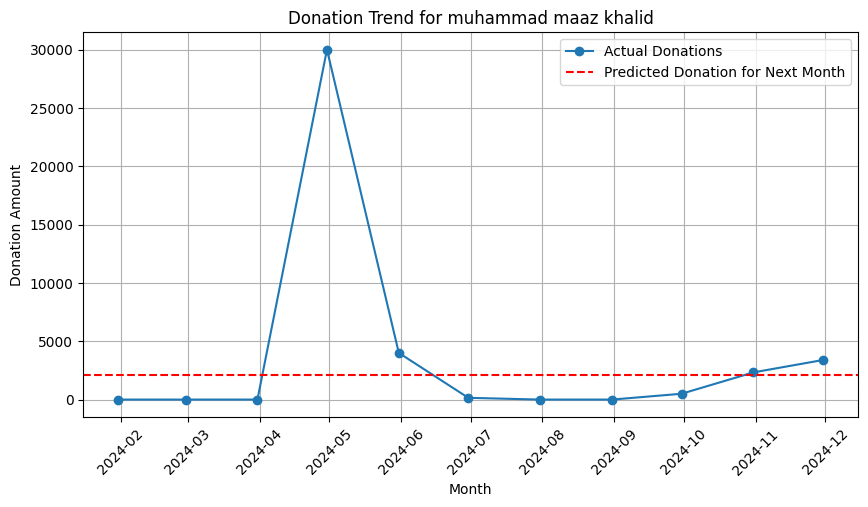

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

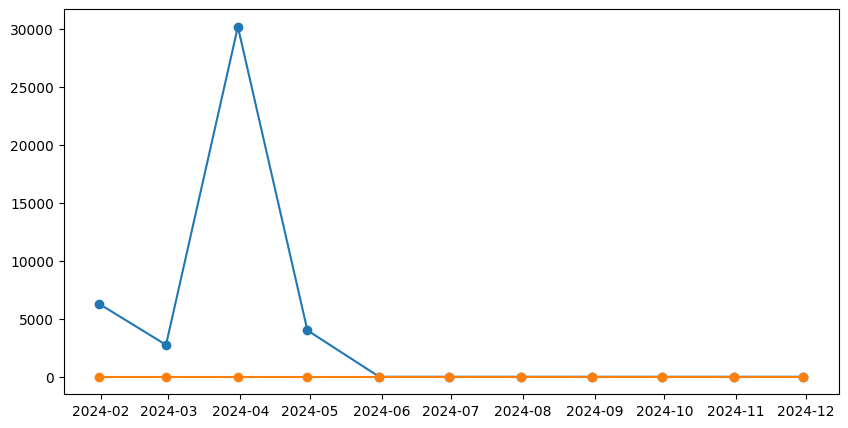

In [77]:
# Optional: Plot the actual values and the predicted value for each member
for member in df.columns:
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df[member], marker='o', label='Actual Donations')
    
    # Plotting the predicted value
    plt.axhline(y=predictions[member], color='r', linestyle='--', label='Predicted Donation for Next Month')
    
    plt.title(f'Donation Trend for {member}')
    plt.xlabel('Month')
    plt.ylabel('Donation Amount')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.show()